# How to Plot using Matplotlib

기본적인 플랏 생성의 규칙

## 필요 라이브러리 다운로드 (설치 후 아래 셀을 markdown으로 만들 것)

!pip install git+https://github.com/BET-lab/dartwork-mpl


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('..')

## 규칙 0. 자주 사용하는 기본 스타일은 matplotlibrc 파일을 활용한다

자주 사용되는 플랏 설정들은 MATPLOTLIBRC에 작성하여 다음과 같은 코드로 로딩할 수 있습니다.  
라이브러리의 파일이름은 자신이 원하는대로 자유롭게 설정할 수 있습니다.

```python
plt.style.use('matplotlibrc')
```

아래 `dartwork_mpl`을 로딩할때도 자동으로 위 코드가 작동하여 기본 스타일이 설정됩니다.   
Seaborn과 같은 플랏 라이브러리 임포트 시 matplotlib의 기본 스타일과 다른 Seaborn의 스타일이 적용되는 것도 같은 원리입니다. 



In [5]:
import dartwork_mpl as dm

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## 규칙 1. 데이터 생성과 플랏 생성을 분리한다

- 플랏 코드를 작성하다보면 데이터 생성 혹은 로딩과 플랏 코드가 뒤섞여서 작성되는 경우가 있습니다.  
- 이러한 경우 에러가 발생한 가능성이 높으며 재사용성이 떨어지는 단점이 발생합니다.  
- 따라서 데이터 생성과 플랏 생성은 별도의 셀로 구분해서 실행합니다.  

데이터 생성

In [150]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y1_data = y1 + np.random.normal(0, 0.1, size=len(y1))
y2 = 2* np.sin(x) / (x + 1)
y2_data = y2 + np.random.normal(0, 0.1, size=len(y2))

## 규칙 2. Matplotlib의 object interface를 사용한다

Matplotlib에는 `plt` 로 시작하는 pyplot 인터페이스와 `fig`, `ax`를 직접 다루는 object 인터페이스가 있습니다.   
pyplot 인터페이스는 글로벌 스테이트에 의존하여 더 유연한 그래프 작성을 방해하며 재사용성이 낮은 단점이 있습니다.   
따라서 플롯을 생성한 후 편집은 object 인터페이스의 사용을 추천합니다.

## 규칙 3. Figure의 생성은 아래와 같은 라인으로 시작한다.

간단한 테스트 시각화 등의 경우 어떻게 그래프를 그려도 상관없지만 논문 퀄리티 수준의 그래프를 작성하는 경우에는 플랏의 모든 객체를 자신이 원하는대로 설정해줘야 합니다.  
따라서 아무런 `Axes` 를 생성하지 않은 채로 피겨의 사이즈만 정해 초기화 하는 아래 방식을 추천합니다.  
논문에서 Single column 플랏은 가로 9 cm, double column 플랏은 가로 17 cm 정도의 크기를 추천합니다.  
벡터 포맷은 scalable 하지만 '선 굵기'의 관점에서 확대 혹은 축소하는 경우 자신의 의도와는 달라집니다.  
따라서 플랏을 그리면서 우리가 의도하고 인지하는 플랏을 실제 출판물의 느낌과 동일하게 가져가기 위해서는 물리적 크기를 반드시 고정하고 그려야 합니다. 

In [151]:
# Figure size의 단위는 인치입니다. Matplotlib에서는 다양한 단위가 혼용되기 때문에
# 언제나 공식 문서를 참조해서 파라미터의 단위를 확인해야 합니다.
# DPI는 디버그시에는 크게 설정할 필요가 없지만 논문 제출시에는 충분히 큰 값을 설정해야 합니다.

fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# 어떠한 Axes도 없기 때문에 시각화 되지 않습니다.
plt.show()

<Figure size 708.661x551.181 with 0 Axes>

## 규칙 4. GridSpec을 생성하여 레이아웃을 작성한다.

간단한 플랏은 그럴 필요가 없지만 논문 작성시 매우 다양한 레이아웃을 생성하게 됩니다. 따라서 처음부터 임의의 레이아웃 설정이 가능한 GridSpec을 초기화 하는 방식을 추천합니다.

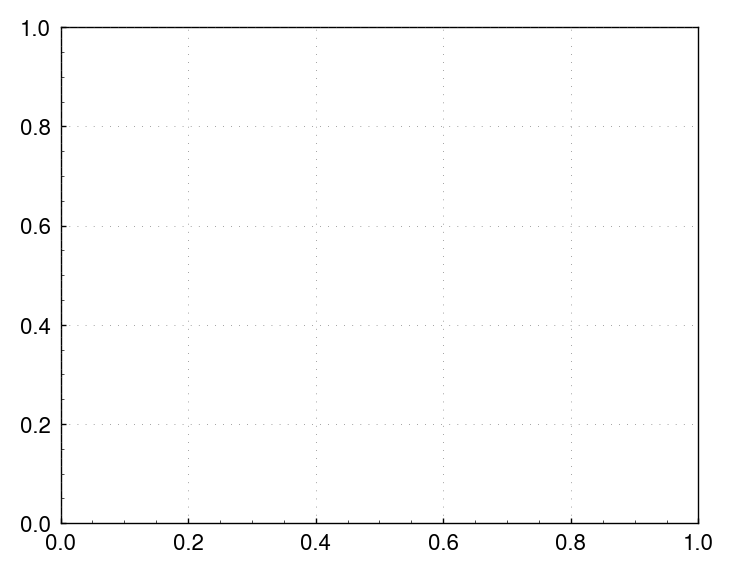

In [152]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

fig.savefig('./asset/fig.1.svg')

plt.show()

다른 마진을 가지는 플랏의 생성

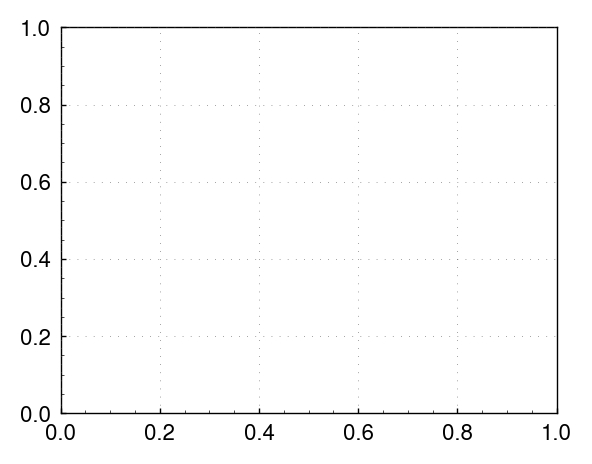

In [153]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

gs = fig.add_gridspec(nrows=1, ncols=1, left=0.15, right=0.85, top=0.85, bottom=0.15, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

fig.savefig('./asset/fig.2.svg', bbox_inches=None)

plt.show()

## 규칙. 5. `plt.show`의 결과가 아닌 `fig.savefig`로 저장된 이미지를 기준으로 작성하라 

위에서 보면 마진이 달라졌는데 플랏의 크기 자체가 변한 것을 확인할 수 있습니다. 이는 예상과 다른 결과입니다. 실제로 저장된 이미지는 아래와 같습니다.

`fig.1.svg`

<img src="./asset/fig.1.svg" width="600px"/>

`fig.2.svg`

<img src="./asset/fig.2.svg" width="600px"/>

`plt.show` 는 임의로 플랏 사이즈를 변경해서 보여주기 떄문에 저장시와 다른 결과를 보여줍니다. `fig.1.svg`의 경우도 마진이 너무 작아 숫자가 잘리는 현상이 발생하지만 `plt.show`로는 확인하기 어렵습니다.

`dartwork-mpl`에는 rcparams로 설정되어 있지만 `savefig.bbox` 옵션이 `standard`로 설정되어 있어야 합니다.

Jupyter notebook에서 저장된 이미지를 보려면 아래와 같은 코드를 작성하여 사용하면 됩니다.

In [154]:
from IPython.display import display, HTML
from xml.dom import minidom


def show(image_path, size=600, unit='pt'):
    # SVG 객체 생성
    svg_obj = SVG(data=image_path)

    # 원하는 가로 폭 또는 세로 높이 설정
    desired_width = size

    # SVG 코드에서 현재 가로 폭과 세로 높이 가져오기
    dom = minidom.parseString(svg_obj.data)
    width = float(dom.documentElement.getAttribute("width")[:-len(unit)])
    height = float(dom.documentElement.getAttribute("height")[:-len(unit)])

    # 비율 계산
    aspect_ratio = height / width
    desired_height = int(desired_width * aspect_ratio)

    # 가로 폭과 세로 높이 설정
    svg_obj.data = svg_obj.data.replace(f'width="{width}{unit}"', f'width="{desired_width}{unit}"')
    svg_obj.data = svg_obj.data.replace(f'height="{height}{unit}"', f'height="{desired_height}{unit}"')

    # HTML을 사용하여 SVG 이미지 표시
    svg_code = svg_obj.data
    display(HTML(svg_code))


def save_and_show(fig, image_path='tmp.svg', size=600, unit='pt'):
    fig.savefig(image_path, bbox_inches=None)
    plt.close(fig)

    show(image_path)


show('./asset/fig.2.svg')

## 규칙. 6. `tight_layout` 알고리즘의 사용은 가능하면 피한다

위 예시처럼 임의로 layout을 바꾸는 알고리즘을 사용하면 사용자가 지정한 파라미터들을 자동으로 수정하기 때문에 예측할 수 없는 플랏들이 생성되곤 합니다. 따라서 모든 값이 어떤 의미인지 파악하기 위하여 tight_layout 알고리즘의 사용은 피하는 것이 좋습니다.

In [155]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.2, right=0.95, top=0.95, bottom=0.2, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

save_and_show(fig)

데이터를 실제로 그리면서 파라미터를 맞춰갑니다.

In [156]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

ax.plot(x, y1)
ax.plot(x, y2)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

save_and_show(fig)

## 규칙. 7. Legend는 핸들과 bbox_to_anchor를 사용하여 작성한다

자동으로 생성되는 legend 기능만 사용하면 실제 다양한 경우에 적합한 legend를 작성하기 어렵습니다. 간단한 경우에도 핸들과 bbox_to_anchor 기능을 활용하는 습관이 필요합니다.

In [157]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [line1, line2]
ax.legend(handles, ['Y1', 'Y2'], loc='lower left')

save_and_show(fig)

다음과 같은 배치도 가능합니다.

In [158]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.9, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [line1, line2]
ax.legend(handles, ['Y1', 'Y2'], loc='lower left', ncols=2, bbox_to_anchor=(0, 1))

save_and_show(fig)

## 규칙 8. Tick에 대한 일반적인 규칙을 최대한 고려한다.

규칙은 다음과 같습니다.

1. Major tick의 위치는 대칭이어야 한다.
2. Minor tick으로 값을 유추하기 쉬워야 한다. 예를 들어 0과 2 사이에 minor 틱이 3개 있다면 각 값이 0.5, 1, 1.5임을 쉽게 유추할 수 있습니다.
3. 유효숫자는 작을수록 좋다. 예를 들어 0.22보다는 0.2가 더 좋습니다.
4. X축의 시작 tick과 Y축의 시작 tick의 공간이 너무 작지 않으면 좋다. 둘 다 0부터 시작하는 그래프는 어쩔 수 없지만 가능하면 공간이 있으면 좋습니다.
5. Tick의 수가 너무 많으면 좋지 않다.

In [159]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [line1, line2]
ax.legend(handles, ['Y1', 'Y2'], loc='lower left')

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.1)

save_and_show(fig)

위 이미지에서 y축의 minor ticks은 0.1, X축의 minor 틱은 0.5의 단위를 가지는 것을 직관적으로 알 수 있습니다.

## 규칙 9. 기본 옵션은 버려라
기본적으로 주어지는 색상이 그리려는 플랏과 완벽하게 조화를 이루는 경우는 없습니다. 선 굵기, 색상, 마커 크기등 핵심적인 요소는 가능하면 각 플랏에 맞춰 직접 수정하는 것이 좋습니다.
색상과 선은 가능하면 의미를 가지는 것이 좋습니다. 디자인적 요소와 의미적 요소의 trade-off의 적절한 지점을 찾는것이 중요합니다.

In [198]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)

scatter1 = ax.scatter(x, y1_data, c='dm.red2', s=0.7)
scatter2 = ax.scatter(x, y2_data, c='dm.blue2', s=0.7)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='upper left', fontsize=plt.rcParams['font.size'] - 2, ncol=2)

handles = [scatter2, line2]
legend2 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='upper right', fontsize=plt.rcParams['font.size'] - 2, ncol=2)

# 먼저 그린 legend는 삭제되기 때문에 다시 추가해줍니다.
ax.add_artist(legend1)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.5)

save_and_show(fig)

다양한 배치가 가능합니다. 그려보기전엔 알 수 없으니 다양한 시도를 해보세요. 여러가지 시도를 하기위해 위와 같은 규칙을 정하여 세부적으로 변경할 수 있게 한 겁니다.

In [194]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.8, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)

scatter1 = ax.scatter(x, y1_data, c='dm.red2', s=0.7)
scatter2 = ax.scatter(x, y2_data, c='dm.blue2', s=0.7)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1] + [scatter2, line2]
labels = ['Y1 data', 'Y1 model'] + ['Y2 data', 'Y2 model']
legend1 = ax.legend(
    handles, labels, loc='upper left', fontsize=plt.rcParams['font.size'] - 2, bbox_to_anchor=(1, 1),
    labelspacing=0.7,
)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.1)

save_and_show(fig)

위 색상들을 고른 이유는 다음과 같습니다.

1. 포인트는 작고 연하게: 각 포인트의 정확한 위치는 중요하지 않습니다. 모델과 유사한 위치에 있음을 보여주면 충분합니다.
2. 선은 얇고 진하게: 이미 포인트가 많은 그래프에서 선이 굵으면 그래프가 복잡해보일 가능성이 있습니다. 트랜드를 보여주면 충분하기 떄문에 얇은 선을 활용했습니다.

1번 선택지의 그래프의 legend 위치 선정 이유는다음과 같습니다.

1. 같은 색상끼리 그룹화 해 더 깔끔한 인상을 줍니다. 그리고 데이터와 모델 페어로 정돈된 느낌을 줍니다. 그리고 데이터로부터 모델이 개발되기 때문에 데이터가 먼저 옵니다. 또한 data보다 model의 글자수가 더 많아 오름차순으로 정돈된 느낌을 줍니다.
2. 공간이 협소하기 때문에 2행을 할애할 공간이 없습니다. 따라서 legend를 2개 만들어 좌우 정렬하여 배치하였습니다. 좌우 정렬은 취향차이입니다.

포인트를 작고 연하게 해서 legend의 포인트까지 안보이는 부작용이 발생했습니다. 이런 경우 더미 플랏을 추가하여 레전드 생성에 사용합니다.

In [202]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(7)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 여백이 많아서 살짝 줄임.
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.17, hspace=0, wspace=0)
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)

ax.scatter(x, y1_data, c='dm.red2', s=0.7)
ax.scatter(x, y2_data, c='dm.blue2', s=0.7)

# Legend를 위한 더미 플랏 생성. 더 진하고 큰 포인트를 사용한다.
scatter1 = ax.scatter([], [], c='dm.red5', s=1)
scatter2 = ax.scatter([], [], c='dm.blue5', s=1)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='upper left', fontsize=plt.rcParams['font.size'] - 2, ncol=2)

handles = [scatter2, line2]
legend2 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='upper right', fontsize=plt.rcParams['font.size'] - 2, ncol=2)

# 먼저 그린 legend는 삭제되기 때문에 다시 추가해줍니다.
ax.add_artist(legend1)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.5)

save_and_show(fig)

## 규칙 10. Matplotlib 좌표계 시스템을 이해한다.
Matplotlib에는 다양한 좌표계가 사용됩니다. Figure, Axes, Display 등의 좌표계가 있으며 이를 이해하지 못하면 다양한 그래프를 그릴 수 없습니다. 아래 링크를 잠조하세요.
https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html

이를 응용한 테크닉 중 하나는 서프 플랏 라벨링입니다. 데이터의 범위, Axes의 크기와 상관없이 항상 폰트 크기 기반으로 위치를 선정할 수 있습니다.

먼저 그래프를 2개로 분리합니다.

In [215]:
fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(14)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 위아래 간격도 적절하게 설정.
gs = fig.add_gridspec(nrows=2, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.1, hspace=0.3, wspace=0)

# Subplot a.
ax = fig.add_subplot(gs[0, 0])

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)

ax.scatter(x, y1_data, c='dm.red2', s=0.7)


# Legend를 위한 더미 플랏 생성. 더 진하고 큰 포인트를 사용한다.
scatter1 = ax.scatter([], [], c='dm.red5', s=1)


ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 2, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.1)


# Subplot b.
ax = fig.add_subplot(gs[1, 0])

line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)
ax.scatter(x, y2_data, c='dm.blue2', s=0.7)
scatter2 = ax.scatter([], [], c='dm.blue5', s=1)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter2, line2]
legend1 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 2, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.1)

save_and_show(fig)

In [220]:
from matplotlib.transforms import ScaledTranslation

axs = []

fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(14)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 위아래 간격도 적절하게 설정.
gs = fig.add_gridspec(nrows=2, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.1, hspace=0.3, wspace=0)

# Subplot a.
ax = fig.add_subplot(gs[0, 0])
axs.append(ax)

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
ax.scatter(x, y1_data, c='dm.red2', s=0.7)


# Legend를 위한 더미 플랏 생성. 더 진하고 큰 포인트를 사용한다.
scatter1 = ax.scatter([], [], c='dm.red5', s=1)


ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)


# Subplot b.
ax = fig.add_subplot(gs[1, 0])
axs.append(ax)

line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)
ax.scatter(x, y2_data, c='dm.blue2', s=0.7)
scatter2 = ax.scatter([], [], c='dm.blue5', s=1)

ax.set_xlabel('X value [Hour]')
ax.set_ylabel('Y value [kW]')

handles = [scatter2, line2]
legend1 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)


# Draw subplot labels.
# 72로 나눠주면 폰트 단위로 라벨을 이동할 수 있습니다.
dx, dy = 4 / 72, -4 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for ax, label in zip(axs, 'ab'):
    ax.text(
        0, 1, label, transform=ax.transAxes + offset, weight='bold',
        verticalalignment='top', horizontalalignment='left'
    )

save_and_show(fig)

라벨을 위해 ylim을 더 넓게 변경하였으며 legend의 폰트 사이즈도 증가시켰습니다. 

또다른 활용은 Figure 단위의 텍스트 생성입니다. Y label을 통일하여 생성하도록 해보겠습니다. 우리는 GridSpec을 생성할때 그 위치를 직접 지정하였기 때문에 바텀과 탑의 중간은 0.525, left는 0.17이라는 사실을 압니다.
이를 바탕으로 ylabel을 텍스트로 직접 생성할 수 있습니다. 대신 이는 Figure coordinates이기 때문에 이에 맞춰 코드를 작성해야 합니다.

In [230]:
from matplotlib.transforms import ScaledTranslation

axs = []

fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(14)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 위아래 간격도 적절하게 설정.
gs = fig.add_gridspec(nrows=2, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.1, hspace=0.3, wspace=0)

# Subplot a.
ax = fig.add_subplot(gs[0, 0])
axs.append(ax)

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
ax.scatter(x, y1_data, c='dm.red2', s=0.7)


# Legend를 위한 더미 플랏 생성. 더 진하고 큰 포인트를 사용한다.
scatter1 = ax.scatter([], [], c='dm.red5', s=1)


ax.set_xlabel('X value [Hour]')
# ax.set_ylabel('Y value [kW]')

handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)


# Subplot b.
ax = fig.add_subplot(gs[1, 0])
axs.append(ax)

line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)
ax.scatter(x, y2_data, c='dm.blue2', s=0.7)
scatter2 = ax.scatter([], [], c='dm.blue5', s=1)

ax.set_xlabel('X value [Hour]')
# ax.set_ylabel('Y value [kW]')

handles = [scatter2, line2]
legend1 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)


# Draw subplot labels.
# 72로 나눠주면 폰트 단위로 라벨을 이동할 수 있습니다.
dx, dy = 4 / 72, -4 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for ax, label in zip(axs, 'ab'):
    ax.text(
        0, 1, label, transform=ax.transAxes + offset, weight='bold',
        verticalalignment='top', horizontalalignment='left'
    )


# Y label 생성. alignment는 vertical, horizonal 둘 다 center로 설정합니다.
fig.text(x=0.05, y=0.525, s='Very long long y axis label [kW]', va='center', ha='center', rotation='vertical')

save_and_show(fig)

X 라벨도 아래와 같은 방법으로 공유할 수 있습니다. 더 나은 시각화를 위하여 Figure의 height를 줄였습니다.

In [233]:
from matplotlib.transforms import ScaledTranslation

axs = []

fig = plt.figure(
    figsize=(dm.cm2in(9), dm.cm2in(12)),
    dpi=200,
)

# x label, y label 생성을 고려하여 마진 설정. 위아래 간격도 적절하게 설정.
gs = fig.add_gridspec(nrows=2, ncols=1, left=0.17, right=0.95, top=0.95, bottom=0.1, hspace=0., wspace=0)

# Subplot a.
ax = fig.add_subplot(gs[0, 0])
axs.append(ax)

# Comma에 주의. List를 리턴하기 때문에 첫번째 요소를 추출해야 함.
# dm으로 시작하는 색상은 dartwork-mpl에서 제공하는 색상입니다. 사용 가능한 모든 색상은 
# https://proplot.readthedocs.io/en/latest/colors.html 에서 확인 가능합니다.
line1, = ax.plot(x, y1, c='dm.red5', lw=0.7)
ax.scatter(x, y1_data, c='dm.red2', s=0.7)


# Legend를 위한 더미 플랏 생성. 더 진하고 큰 포인트를 사용한다.
scatter1 = ax.scatter([], [], c='dm.red5', s=1)





handles = [scatter1, line1]
legend1 = ax.legend(handles, ['Y1 data', 'Y1 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)

ax.set_xlabel('')
ax.set_xticklabels([''] * 6)

# Subplot b.
ax = fig.add_subplot(gs[1, 0])
axs.append(ax)

line2, = ax.plot(x, y2, c='dm.blue5', lw=0.7)
ax.scatter(x, y2_data, c='dm.blue2', s=0.7)
scatter2 = ax.scatter([], [], c='dm.blue5', s=1)

ax.set_xlabel('X value [Hour]')
# ax.set_ylabel('Y value [kW]')

handles = [scatter2, line2]
legend1 = ax.legend(handles, ['Y2 data', 'Y2 model'], loc='lower left', fontsize=plt.rcParams['font.size'] - 1, labelspacing=0.7)

ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.set_ylim(-1.1, 1.2)


# Draw subplot labels.
# 72로 나눠주면 폰트 단위로 라벨을 이동할 수 있습니다.
dx, dy = 4 / 72, -4 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for ax, label in zip(axs, 'ab'):
    ax.text(
        0, 1, label, transform=ax.transAxes + offset, weight='bold',
        verticalalignment='top', horizontalalignment='left'
    )


# Y label 생성. alignment는 vertical, horizonal 둘 다 center로 설정합니다.
fig.text(x=0.05, y=0.525, s='Very long long y axis label [kW]', va='center', ha='center', rotation='vertical')

save_and_show(fig)

위 그래프는 X tick을 공유해서 더 아름답거나 명확하거나 효율적이지는 않은 것 같습니다.